The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



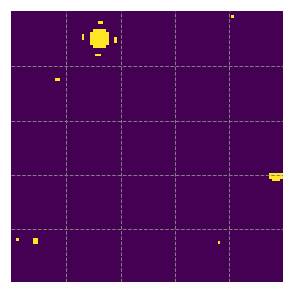

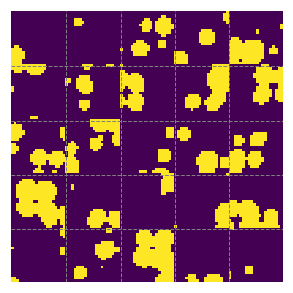

In [578]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from htmresearch.support.gridcells.gridunions.utils import *
%load_ext autoreload
%autoreload 2


m    = 5
nr   = 5**2
nc_  = 20
nc   = nc_**2
diam = 2.4


# S = np.sqrt(2)**np.arange(m)
S = np.random.normal(3.,1.5,size=m)
# S = np.ones(m)*2.
M = create_2d_hyper_module(m, scale=S)

A = create_action_tensor(M)
PC  = create_atlas(nr, nc_, diam)

Anchors = np.random.sample((nr,m,2))
# Anchors = np.zeros((nr,m,2))

Phi = create_phase_atlas(PC, Anchors, A) 


i_r = 2
i_m = 0

# plt.scatter(PC[i_r,:,0], PC[i_r,:,1])
# plt.show()

# plt.scatter(Phi[i_r,:,i_m,0], Phi[i_r,:,i_m, 1])
# plt.show()


def place_code(phi, pinned_phases):
    nr, nc, m, _ = pinned_phases.shape
    print 
    z = phase_dist(phi.reshape((1,m,2)), pinned_phases.reshape((-1,m,2)))
    z = np.exp(-z**2/.4)
    return z.reshape((nr,nc))


def J(phi, z, pinnded_phases):
    z_ = place_code(phi, pinnded_phases)
    return np.sqrt( np.sum( (z - z_)**2 ) )




def display(z):
    nr, nc = z.shape
    nc_ = np.sqrt(nc).astype(int)
    nr_ = np.sqrt(nr).astype(int)

    plt.figure(figsize=(20,5))
#     for i in range(nr_):
#         for j in range(nr_):
            
    imgs = z.reshape((nr_, nr_, nc_,nc_))
    img = np.concatenate([ np.concatenate(row[:], axis=1) for row in imgs], axis=0)
    plt.imshow(img)
    for i in range(1,nr_):
        plt.axvline(i*nc_, linestyle='--', linewidth=1., color="gray")
        plt.axhline(i*nc_, linestyle='--', linewidth=1., color="gray")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.show()


    
    

z = place_code(Phi[1,212], Phi)
display(z > 0.5);
# display(z);
z = place_code(np.random.sample((m,2)), Phi)
display(z > 0.2);
# display(z);



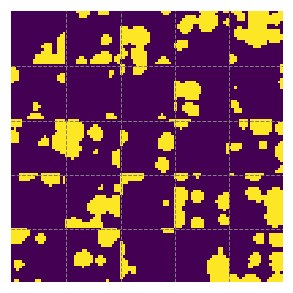

In [593]:

z = place_code(np.random.sample((m,2)), Phi)
display(z > 0.2);
# display(z);
